In [69]:
using GittinsIndices
using Distributions
using Plots

In [111]:
function get_gittins_action(gittins_priors, gamma)
    gittins_indices = [
        calculate_bernoulli_gittins(
            alpha = alpha, 
            beta = beta, 
            gamma = gamma,
        ) for (alpha, beta) in gittins_priors
    ]
    gittins_action = argmax(gittins_indices)
    return gittins_action
end

function get_thompson_action(thompson_priors)
    thompson_sampling_probs = [
        alpha / (alpha + beta) 
        for (alpha, beta) in thompson_priors
    ]
    thompson_sampling_probs ./= sum(thompson_sampling_probs)
    thompson_action = rand(Categorical(thompson_sampling_probs))
    return thompson_action
end

get_thompson_action (generic function with 1 method)

In [112]:
function gittins_ucb_thompson(;num_arms, gamma, num_pulls)
    arms = [Bernoulli(rand(Float64)) for _ in 1:num_arms]
    
    gittins_priors = [[1, 1] for _ in 1:num_arms]
    gittins_rewards = []
    
    thompson_priors = [[1, 1] for _ in 1:num_arms]
    thompson_rewards = []
    
    for pull in 1:num_pulls
        # gittins indices
        gittins_action = get_gittins_action(gittins_priors, gamma)
        gittins_reward = rand(arms[gittins_action])
        push!(gittins_rewards, gittins_reward)
        gittins_priors[gittins_action][gittins_reward ? 1 : 2] += 1        
        
        # thompson sampling
        thompson_action = get_thompson_action(thompson_priors)
        thompson_reward = rand(arms[thompson_action])
        push!(thompson_rewards, thompson_reward)
        thompson_priors[thompson_action][thompson_reward ? 1 : 2] += 1
    end
    return (
        gittins_rewards=gittins_rewards, 
        thompson_rewards=thompson_rewards,
    )
end

gittins_ucb_thompson (generic function with 1 method)

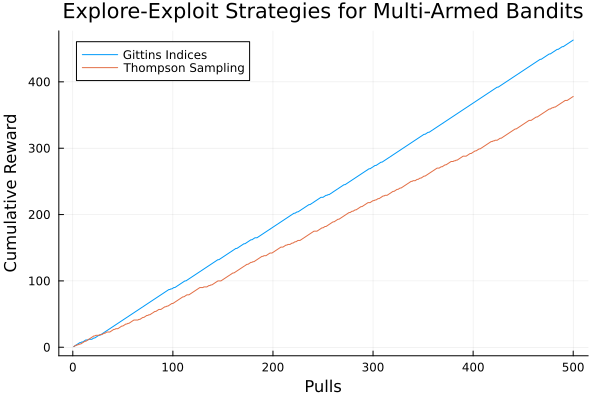

In [117]:
function graph_results()
    num_pulls = 500
    num_arms = 10
    gamma = 0.99
    
    results = gittins_ucb_thompson(
        num_arms = num_arms,
        num_pulls = num_pulls,
        gamma = gamma,
    )
    
    plot(
        1:num_pulls, 
        [
            cumsum(results.gittins_rewards),
            cumsum(results.thompson_rewards),
        ], 
        title="Explore-Exploit Strategies for Multi-Armed Bandits", 
        label=["Gittins Indices" "Thompson Sampling"],
        xlabel="Pulls",
        ylabel="Cumulative Reward",
    )
end

graph_results()